
# Import Required Libraries


- `import numpy as np`  
  - Imports **NumPy**, a core library for **numerical computations** in Python.
  - Used for handling **arrays**, **mathematical operations**, and **matrix manipulations**.

- `import pandas as pd`  
  - Imports **Pandas**, used for **data manipulation** and **analysis**.
  - Provides the **DataFrame structure** to store and operate on tabular data.

- `import tensorflow as tf`  
  - Loads **TensorFlow**, a powerful open-source library used for building and training **deep learning models** like Artificial Neural Networks (ANNs).

- `from sklearn.preprocessing import StandardScaler`  
  - Imports the **StandardScaler** class from Scikit-learn.
  - Used to **normalize numerical features** by removing the mean and scaling to unit variance.

- `from sklearn.model_selection import train_test_split`  
  - Imports a function to **split the dataset** into **training and testing subsets**.
  - Ensures the model is evaluated on unseen data.

- `from sklearn.compose import ColumnTransformer`  
  - Allows application of different preprocessing pipelines to **specific column types** (e.g., numeric vs. categorical).

- `from sklearn.preprocessing import OneHotEncoder`  
  - Imports **OneHotEncoder** for converting **categorical variables** into binary (0/1) encoded features, a format required for machine learning models.



In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder


 #  Load Sample Data
 In this step, we **import the Churn dataset** using **Pandas**, which is a powerful Python library for data analysis and manipulation.
- `import pandas as pd`:  
  - Imports the **Pandas library** and assigns it the alias **`pd`**.
  - Pandas is used to **load, explore, and manipulate datasets**.

- `pd.read_csv("Churn_Modelling.csv")`:  
  - Reads the CSV file named **`Churn_Modelling.csv`**.
  - Returns a **DataFrame** containing all the data.

- `.head()`:  
  - Displays the **first 5 rows** of the dataset.
  - Useful to **quickly inspect** the structure and values in the data.

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving Churn_Modelling.csv to Churn_Modelling (2).csv


In [ ]:
import pandas as pd
data = pd.read_csv("Churn_Modelling.csv")
data.head()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Drop Useless Columns
In this step, we are removing irrelevant or non-informative columns from our dataset. These columns, such as **IDs** or **names**, do not help in the prediction task and may negatively impact model performance.

In [ ]:

cols_to_drop = ['RowNumber', 'CustomerId', 'Surname']
existing_cols = [col for col in cols_to_drop if col in data.columns]
data = data.drop(existing_cols, axis=1)

print(data.head())


   CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0          619    France  Female   42       2       0.00              1   
1          608     Spain  Female   41       1   83807.86              1   
2          502    France  Female   42       8  159660.80              3   
3          699    France  Female   39       1       0.00              2   
4          850     Spain  Female   43       2  125510.82              1   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0          1               1        101348.88       1  
1          0               1        112542.58       0  
2          1               0        113931.57       1  
3          0               0         93826.63       0  
4          1               1         79084.10       0  


In [ ]:
print(data.columns.tolist())


['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']


In [ ]:
data.shape

(10000, 11)

# Encode Categorical Variables
n this step, we define our input features (`X`) and target label (`y`), and then apply **OneHotEncoding** to convert categorical variables into numeric format.

---
####  1. Define Input Features (**X**) and Target Label (**y**):
- We take the column called **'Exited'** (which tells whether the customer left or not) and set it as the output label **`y`**.
- All the other columns (features like **Age**, **Balance**, **Geography**, etc.) are stored in a new variable **`X`**.

####  2. Identify **Categorical Columns**:
- Some columns, like **`Gender`** and **`Geography`**, contain **text values** (categories).
- Since ML models require **numerical data**, we need to convert these **text categories** into numbers.

####  3. Apply **One-Hot Encoding**:
- We use **One-Hot Encoding**, which converts each **category** into a separate **binary column** (with **0s and 1s**).
- This is done only on the **categorical columns** (`Geography` and `Gender`), and the **rest of the columns stay unchanged**.
- We use **`ColumnTransformer`** to apply this transformation.

####  4. View the Transformed Data:
- After encoding, we check the **shape and contents** of the features (**X**) to confirm it's now fully **numerical**.
- This means the dataset is now **ready for model training**.

In [ ]:
# Define input features (X) and label (y)
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder


X = data.drop('Exited', axis=1)
y = data['Exited']

print("Input Features (X) BEFORE Encoding:")
print(X.head())

print("\nOutput Label (y):")
print(y.head())

# Step 2: Apply OneHotEncoding to categorical columns
categorical_columns = [1, 2]  # Geography and Gender

ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), categorical_columns)], remainder='passthrough')

X = ct.fit_transform(X)

# Step 3: Show results after encoding
print("\nInput Features (X) AFTER Encoding (as array):")
print(X[:5])  # Show first 5 rows

print("\nShape of X:", X.shape)
print(" Shape of y:", y.shape)


Input Features (X) BEFORE Encoding:
   CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0          619    France  Female   42       2       0.00              1   
1          608     Spain  Female   41       1   83807.86              1   
2          502    France  Female   42       8  159660.80              3   
3          699    France  Female   39       1       0.00              2   
4          850     Spain  Female   43       2  125510.82              1   

   HasCrCard  IsActiveMember  EstimatedSalary  
0          1               1        101348.88  
1          0               1        112542.58  
2          1               0        113931.57  
3          0               0         93826.63  
4          1               1         79084.10  

Output Label (y):
0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

Input Features (X) AFTER Encoding (as array):
[[1.0000000e+00 0.0000000e+00 0.0000000e+00 1.0000000e+00 0.0000000e+00
  6.1900000e+02 4.2000000

##  Reconstruct Encoded DataFrame with Proper Column Names

####  1. Retrieve Names of Encoded Columns:
- The line  
  `ct.named_transformers_['encoder'].get_feature_names_out(['Geography', 'Gender'])`  
  gives us the **new column names** created by **One-Hot Encoding**.
- For example, it might return something like:  
  **`['Geography_France', 'Geography_Germany', 'Gender_Female']`**

####  2. Get the Original (Non-Categorical) Column Names:
- We drop the target column **'Exited'** from the original data to get only feature names.
- Then, using **enumerate**, we skip the columns that were **categorical**, so we’re left with the **numerical features** like **Age**, **Balance**, **CreditScore**, etc.

####  3. Combine Encoded and Numerical Column Names:
- The encoded and original column names are combined into one list called **`all_columns`**.
- This ensures we have a **complete list of all final column names**, in the correct order.

####  4. Rebuild the Final DataFrame:
- Finally, we use `pd.DataFrame()` to turn the encoded array **X** back into a proper **DataFrame** with **column names**.
- This makes the data much easier to **understand**, **visualize**, and **debug** later.

In [ ]:


encoded_columns = ct.named_transformers_['encoder'].get_feature_names_out(['Geography', 'Gender'])


original_columns = data.drop('Exited', axis=1).columns


numerical_columns = [col for i, col in enumerate(original_columns) if i not in categorical_columns]

all_columns = list(encoded_columns) + numerical_columns

import pandas as pd


X_df = pd.DataFrame(X, columns=all_columns)

print("\n✅ Encoded Features (X) with Column Names:")
print(X_df.head())



✅ Encoded Features (X) with Column Names:
   Geography_France  Geography_Germany  Geography_Spain  Gender_Female  \
0               1.0                0.0              0.0            1.0   
1               0.0                0.0              1.0            1.0   
2               1.0                0.0              0.0            1.0   
3               1.0                0.0              0.0            1.0   
4               0.0                0.0              1.0            1.0   

   Gender_Male  CreditScore   Age  Tenure    Balance  NumOfProducts  \
0          0.0        619.0  42.0     2.0       0.00            1.0   
1          0.0        608.0  41.0     1.0   83807.86            1.0   
2          0.0        502.0  42.0     8.0  159660.80            3.0   
3          0.0        699.0  39.0     1.0       0.00            2.0   
4          0.0        850.0  43.0     2.0  125510.82            1.0   

   HasCrCard  IsActiveMember  EstimatedSalary  
0        1.0             1.0        1

# Feature Scaling and Train-Test Split

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np


X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=0
)

print("✅ Data Splitting Done")
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)







X_train_categorical = X_train[:, :5]
X_train_numeric = X_train[:, 5:]

X_test_categorical = X_test[:, :5]
X_test_numeric = X_test[:, 5:]



sc = StandardScaler()
X_train_numeric_scaled = sc.fit_transform(X_train_numeric)
X_test_numeric_scaled = sc.transform(X_test_numeric)



X_train_scaled = np.concatenate((X_train_categorical, X_train_numeric_scaled), axis=1)
X_test_scaled = np.concatenate((X_test_categorical, X_test_numeric_scaled), axis=1)

print("\n✅ Feature Scaling Done (Only Numeric Features Scaled)")
print("First 5 rows of X_train_scaled:")
print(X_train_scaled[:5])


✅ Data Splitting Done
X_train shape: (8000, 13)
X_test shape: (2000, 13)

✅ Feature Scaling Done (Only Numeric Features Scaled)
First 5 rows of X_train_scaled:
[[ 0.          0.          1.          1.          0.          0.16958176
  -0.46460796  0.00666099 -1.21571749  0.8095029   0.64259497 -1.03227043
   1.10643166]
 [ 0.          1.          0.          0.          1.         -2.30455945
   0.30102557 -1.37744033 -0.00631193 -0.92159124  0.64259497  0.9687384
  -0.74866447]
 [ 1.          0.          0.          1.          0.         -1.19119591
  -0.94312892 -1.031415    0.57993469 -0.92159124  0.64259497 -1.03227043
   1.48533467]
 [ 0.          0.          1.          0.          1.          0.03556578
   0.10961719  0.00666099  0.47312769 -0.92159124  0.64259497 -1.03227043
   1.27652776]
 [ 0.          0.          1.          1.          0.          2.05611444
   1.73658844  1.04473698  0.8101927   0.8095029   0.64259497  0.9687384
   0.55837842]]


# Build the ANN

* **Neural Network model** using the **Keras Sequential API**. This type of model is called an **Artificial Neural Network (ANN)** and is used for **binary classification** (predicting churn: yes or no).
* This step helps us understand how **balanced** or **imbalanced** the target labels are in our dataset.



In [ ]:
print(y.value_counts())
print("\nProportion:\n", y.value_counts(normalize=True))
print("Class Distribution:")
print(y.value_counts().rename({0: "Stayed", 1: "Left"}))


Exited
0    7963
1    2037
Name: count, dtype: int64

Proportion:
 Exited
0    0.7963
1    0.2037
Name: proportion, dtype: float64
Class Distribution:
Exited
Stayed    7963
Left      2037
Name: count, dtype: int64


  ##  Build and Train a Simple Neural Network (No Hidden Layer)
  A **Sequential model** is initialized. This type of model allows us to build the network by stacking layers one after the other.

- Then, a **Dense layer** (fully connected layer) is added with:
  - **1 unit**, representing the **single output neuron** for binary prediction.
  - **Sigmoid activation**, which ensures the output is between 0 and 1.
  - **Input shape** is defined based on the number of features in the training data.

- The model is **compiled** using:
  - **Adam optimizer**, which adjusts the learning rate during training.
  - **Binary cross-entropy loss**, ideal for binary classification.
  - **Accuracy metric** to evaluate performance.

- The model is then **trained** using the `fit()` function with:
  - **Batch size** of 32 (number of samples per gradient update).
  - **100 epochs**, meaning the model will go through the entire dataset 100 times.

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


model = Sequential()


model.add(Dense(units=1, activation='sigmoid', input_shape=(X_train.shape[1],)))


model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


history = model.fit(X_train, y_train, batch_size=32, epochs=100)


loss, accuracy = model.evaluate(X_test, y_test)
print("\n✅ Test Accuracy (no hidden layer):", accuracy)


Epoch 1/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3318 - loss: 20849.0918
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4814 - loss: 8736.9062
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5294 - loss: 2926.7043
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7245 - loss: 21.8760
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7173 - loss: 19.6576
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7098 - loss: 15.2842
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7073 - loss: 13.5233
Epoch 8/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7140 - loss: 9.7253
Epoch 9/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7023 - loss: 7.3613
Epoch 10/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6853 - loss: 6.3348
Epoch 11/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6734 - loss: 10.7325
Epoch 12/100
250/250 ━━━━━

# Model Evaluation and Predictions
 - The model is evaluated using the **`evaluate()` function**:
  - It returns the **loss** and **accuracy** of the model on the test set.
  - **Loss** helps measure how well the model’s predictions match the actual labels.
  - **Accuracy** indicates the percentage of correct predictions
# Predictions:

- The model then makes predictions using the **`predict()` function**:
  - It outputs the **predicted probabilities** (values between 0 and 1), showing how confident the model is that each sample belongs to class 1.

- These probabilities are **converted into binary classes** (0 or 1) by applying a **threshold of 0.5**:
  - Values > 0.5 are considered **class 1** (e.g., "Churn").
  - Values ≤ 0.5 are considered **class 0** (e.g., "Stayed").


In [ ]:
import numpy as np


loss, accuracy = model.evaluate(X_test, y_test)
print("\n✅ Test Loss:", loss)
print("✅ Test Accuracy:", accuracy)


y_pred_prob = model.predict(X_test)


y_pred = (y_pred_prob > 0.5).astype(int)


print("\n🔍 First 10 predicted values (probabilities):")
print(np.round(y_pred_prob[:10], 2))

print("\n🎯 First 10 predicted classes (0 or 1):")
print(y_pred[:10].flatten())

print("\n✅ First 10 actual labels:")
print(y_test.values[:10])


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7843 - loss: 5.7161

✅ Test Loss: 5.611939430236816
✅ Test Accuracy: 0.7889999747276306
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

🔍 First 10 predicted values (probabilities):
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]]

🎯 First 10 predicted classes (0 or 1):
[0 0 0 0 0 0 0 0 1 0]

✅ First 10 actual labels:
[0 1 0 0 0 1 0 0 1 1]


# Model Evaluation Using Performance Metrics

This section calculates several **evaluation metrics** to assess how well the classification model performs on unseen data (test set). These metrics give deeper insights beyond simple accuracy.

---

These metrics help in assessing model performance from different angles:
- **F1 Score** and **AUC** are ideal for imbalanced classes.
- **Classification Report** gives class-wise details.
- **Confusion Matrix** shows the overall prediction breakdown.


In [ ]:
from sklearn.metrics import f1_score, roc_auc_score, classification_report, confusion_matrix


f1 = f1_score(y_test, y_pred)
print("\n📏 F1 Score:", round(f1, 4))


auc = roc_auc_score(y_test, y_pred_prob)
print("📈 ROC AUC Score:", round(auc, 4))


print("\n🧾 Classification Report:")
print(classification_report(y_test, y_pred))


print("\n🧮 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))



📏 F1 Score: 0.1021
📈 ROC AUC Score: 0.5395

🧾 Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.97      0.88      1595
           1       0.37      0.06      0.10       405

    accuracy                           0.79      2000
   macro avg       0.59      0.52      0.49      2000
weighted avg       0.72      0.79      0.72      2000


🧮 Confusion Matrix:
[[1554   41]
 [ 381   24]]


# ROC Curve Visualization and AUC Score

This section visualizes the **ROC Curve (Receiver Operating Characteristic)** and calculates the **AUC (Area Under the Curve)**. This plot helps evaluate the model’s classification performance based on **predicted probabilities**.

---
- **AUC Score Calculation**:
  - The **AUC (Area Under Curve)** is computed using `roc_auc_score()`.
  - It quantifies the model's ability to **distinguish between positive and negative classes**.
  - An AUC of **1.0** indicates perfect classification; **0.5** suggests random guessing.

- **ROC Curve Generation**:
  - The `roc_curve()` function calculates:
    - **FPR (False Positive Rate)**
    - **TPR (True Positive Rate)**
    - **Thresholds** used to classify probabilities into class labels.
  - These values are then used to draw the ROC curve.

- **Plotting the Curve**:
  - A **line plot** is created with `TPR` vs. `FPR`.
  - A **diagonal dashed line (k--)** represents a no-skill model (random guessing).
  - The actual ROC curve lies **above the diagonal** if the model performs well.
  - A **legend shows the AUC score**, and gridlines make the chart more readable.




📈 ROC AUC Score: 0.5395


/tmp/ipython-input-33-1535773308.py:19: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


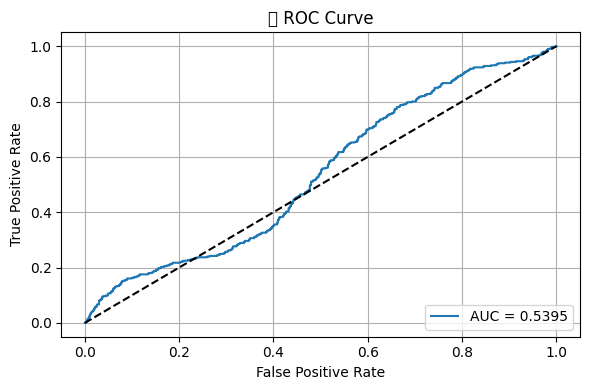

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt


auc = roc_auc_score(y_test, y_pred_prob)
print(f"\n📈 ROC AUC Score: {round(auc, 4)}")


fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"AUC = {round(auc, 4)}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('📊 ROC Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()


# Build the ANN (with Hidden Layer)


This section summarizes the behavior and performance of a basic Artificial Neural Network (ANN) model with **one hidden layer**.


-  This is a **simple ANN model** designed for **binary classification problems** such as **customer churn prediction**.
-  The **hidden layer** uses **ReLU activation**, which helps capture complex non-linear relationships in the data.
- The **output layer** uses **Sigmoid activation**, converting the final output into a **probability between 0 and 1**.
-  The model is evaluated using **loss** and **accuracy** metrics on the **test dataset**, giving insight into its performance on unseen data.
-  Acts as a **baseline neural architecture**, and can be further enhanced with **additional hidden layers** or **regularization techniques** for better performance.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


model_1_hidden = Sequential()


model_1_hidden.add(Dense(units=6, activation='relu', input_shape=(X_train.shape[1],)))


model_1_hidden.add(Dense(units=1, activation='sigmoid'))


model_1_hidden.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


history_1_hidden = model_1_hidden.fit(X_train, y_train, batch_size=32, epochs=100, verbose=1)


loss, accuracy = model_1_hidden.evaluate(X_test, y_test)
print("\n📊 ANN with 1 Hidden Layer")
print(f"✅ Test Loss: {loss}")
print(f"✅ Test Accuracy: {accuracy}")


Epoch 1/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5934 - loss: 0.6638
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7926 - loss: 0.5071
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7991 - loss: 0.4573
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8075 - loss: 0.4314
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8186 - loss: 0.4242
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8171 - loss: 0.4180
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8282 - loss: 0.4028
Epoch 8/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8271 - loss: 0.4061
Epoch 9/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8371 - loss: 0.3925
Epoch 10/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8385 - loss: 0.3854
Epoch 11/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8456 - loss: 0.3732
Epoch 12/100
250/250 ━━━━━━━━━━━━━━━━━━━━

## 🧪 Evaluation of ANN (1 Hidden Layer)

This section evaluates the **performance** of the trained **Artificial Neural Network (ANN)** using several key **classification metrics** and visualizes the **ROC Curve**.

---

###  Evaluate on Test Set
- The model is evaluated on **unseen data** (`X_test`, `y_test`).
- Returns:
  - **Loss** – How far predictions are from actual labels.
  - **Accuracy** – Proportion of correct predictions.


###  Predict Probabilities
- The model outputs **probabilities** between 0 and 1.
- Uses the **sigmoid activation function** in the output layer to generate these values.


###  Thresholding for Class Labels
- Probabilities are converted to **binary class labels**:
  - If **probability > 0.5**, predicted class = **1**
  - Otherwise, predicted class = **0**



###  Compute Evaluation Metrics
- **F1 Score**:
  - Harmonic mean of **Precision** and **Recall**.
  - Valuable for **imbalanced datasets**.
- **ROC AUC Score**:
  - Measures the model’s ability to **distinguish between classes**.
  - AUC closer to **1.0** indicates **better performance**.



### Classification Report
- Provides detailed metrics for each class:
  - **Precision**
  - **Recall**
  - **F1-score**
  - **Support (number of instances)**



###  Confusion Matrix
- Summarizes prediction results:
  - **TP (True Positives)**
  - **TN (True Negatives)**
  - **FP (False Positives)**
  - **FN (False Negatives)**



###  ROC Curve Plot
- Plots:
  - **True Positive Rate (TPR)** vs. **False Positive Rate (FPR)**
- Highlights:
  - The **AUC score** is shown in the legend.
  - A **diagonal dashed line** represents a no-skill model (random guessing).
  - Gridlines and tight layout improve readability.



63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8621 - loss: 0.3410

✅ Test Loss: 0.3403795659542084
✅ Test Accuracy: 0.8619999885559082
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

📏 F1 Score: 0.5633
📈 ROC AUC Score: 0.8529

🧾 Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.74      0.45      0.56       393

    accuracy                           0.86      2000
   macro avg       0.81      0.71      0.74      2000
weighted avg       0.85      0.86      0.85      2000

🧮 Confusion Matrix:
[[1546   61]
 [ 215  178]]


/tmp/ipython-input-47-1189981296.py:42: UserWarning: Glyph 129514 (\N{TEST TUBE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129514 (\N{TEST TUBE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


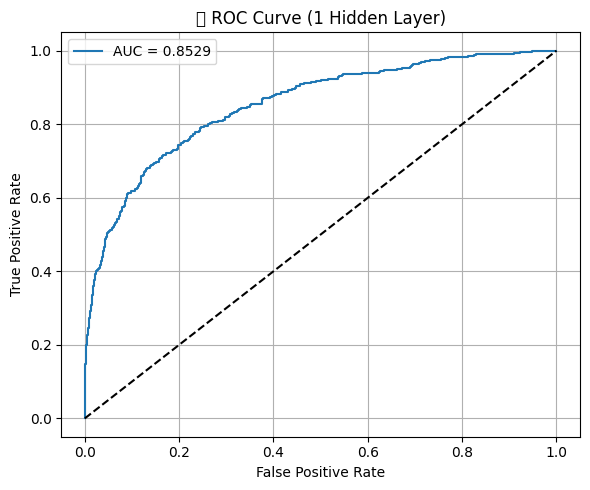

In [ ]:
from sklearn.metrics import f1_score, roc_auc_score, classification_report, confusion_matrix, roc_curve
import matplotlib.pyplot as plt
import numpy as np


loss, accuracy = model_1_hidden.evaluate(X_test, y_test)
print("\n✅ Test Loss:", loss)
print("✅ Test Accuracy:", accuracy)


y_pred_prob = model_1_hidden.predict(X_test)


y_pred = (y_pred_prob > 0.5).astype(int)


f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_prob)

print(f"\n📏 F1 Score: {f1:.4f}")
print(f"📈 ROC AUC Score: {auc:.4f}")


print("\n🧾 Classification Report:")
print(classification_report(y_test, y_pred))


print("🧮 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


fpr, tpr, _ = roc_curve(y_test, y_pred_prob)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f'AUC = {auc:.4f}')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("🧪 ROC Curve (1 Hidden Layer)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


**I balanced this imbalanced data in Assignment 4, Task 2.**
